<a href="https://colab.research.google.com/github/namari1/Google-Colab-Projects/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 98.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

###**Median Household Income 2015**


In [6]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [7]:
df_hh_income[df_hh_income.duplicated()]

,Geographic Area,City,Median Income


In [8]:
df_hh_income.head(2)

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615


###**Percent of People Under Poverty Line**

In [9]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [10]:
df_pct_poverty[df_pct_poverty.duplicated()]

,Geographic Area,City,poverty_rate


In [11]:
df_pct_poverty.head(4)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7


###**Percent of High School Graduates over 25**

In [12]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [13]:
df_pct_completed_hs[df_pct_completed_hs.duplicated()]

,Geographic Area,City,percent_completed_hs


In [14]:
df_pct_completed_hs.head(2)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1


###**Racial Profile of Cities**

In [15]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [16]:
df_share_race_city[df_share_race_city.duplicated()]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic


In [17]:

df_share_race_city.head(3)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3


###**Police Fatalaties**

In [18]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [19]:
df_fatalities[df_fatalities.duplicated()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera


In [20]:


df_fatalities.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False


In [21]:
df_fatalities.isna().values.sum()

346

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [22]:
df_pct_poverty.sort_values("poverty_rate", ascending=False)

,Geographic Area,City,poverty_rate
4472,FL,Homestead Base CDP,98.6
23716,SD,Allen CDP,94.1
20428,OK,Badger Lee CDP,93.8
27738,WA,Outlook CDP,93.8
26509,UT,Randlett CDP,93.5
...,...,...,...
24980,TX,El Mesquite CDP,-
2864,CA,Myers Flat CDP,-
10747,LA,Sugartown CDP,-
16400,NJ,Zarephath CDP,-


In [23]:
df_poverty = df_pct_poverty.dropna(subset=["poverty_rate"])
df_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [24]:
df_poverty.sort_values("poverty_rate", ascending=False)

,Geographic Area,City,poverty_rate
4472,FL,Homestead Base CDP,98.6
23716,SD,Allen CDP,94.1
20428,OK,Badger Lee CDP,93.8
27738,WA,Outlook CDP,93.8
26509,UT,Randlett CDP,93.5
...,...,...,...
24980,TX,El Mesquite CDP,-
2864,CA,Myers Flat CDP,-
10747,LA,Sugartown CDP,-
16400,NJ,Zarephath CDP,-


In [25]:
df_poverty.poverty_rate = pd.to_numeric(df_poverty.poverty_rate, errors="coerce")
df_poverty.describe()

,poverty_rate
count,"29,128.00"
mean,16.44
std,13.18
min,0.00
25%,7.10
50%,13.70
75%,22.50
max,100.00


In [26]:
state_poverty = df_poverty.groupby("Geographic Area", as_index=False).agg({"poverty_rate": pd.Series.mean})
state_poverty.sort_values("poverty_rate", ascending=False)

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96
18,LA,22.34
40,SC,22.16
49,WV,21.13
36,OK,20.66
1,AL,20.65


In [27]:
fig= px.bar(state_poverty, x="Geographic Area", y="poverty_rate",
            labels={
                "Geographic Area": "State",
                "poverty_rate": "Poverty Rate"
            })
fig.update_layout(xaxis={"categoryorder": "total descending"})
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [32]:
df_hs = df_pct_completed_hs.dropna(subset=["percent_completed_hs"])
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [33]:
df_hs.percent_completed_hs = pd.to_numeric(df_hs.percent_completed_hs, errors="coerce")
df_hs.describe()

,percent_completed_hs
count,"29,132.00"
mean,85.73
std,11.88
min,0.00
25%,81.00
50%,88.40
75%,93.50
max,100.00


In [37]:
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [36]:
df_hs.sort_values("percent_completed_hs", ascending=False)

,Geographic Area,City,percent_completed_hs
29328,WY,Y-O Ranch CDP,100.00
18832,ND,Caledonia CDP,100.00
18833,ND,Calio city,100.00
18834,ND,Calvin city,100.00
12171,MI,Omena CDP,100.00
...,...,...,...
29261,WY,Oakley CDP,NaN
29266,WY,Owl Creek CDP,NaN
29273,WY,Powder River CDP,NaN
29289,WY,Ryan Park CDP,NaN


In [38]:
df_hs = df_hs.dropna(subset=["percent_completed_hs"])
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29132 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29132 non-null  object 
 1   City                  29132 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.4+ KB


In [41]:
states_hs = df_hs.groupby("Geographic Area", as_index=False).agg({"percent_completed_hs": pd.Series.mean})
states_hs.sort_values("percent_completed_hs", ascending=False)

,Geographic Area,percent_completed_hs
19,MA,92.40
50,WY,92.10
11,HI,91.67
44,UT,91.62
6,CT,91.59
21,ME,91.43
31,NJ,90.85
30,NH,90.71
34,NY,90.61
26,MT,90.49


In [46]:
fig = px.bar(states_hs, x="Geographic Area", y="percent_completed_hs",
             labels={
                "Geographic Area": "State",
                "percent_completed_hs": "High School Graduation Rate"
             })
fig.update_layout(yaxis_range=[70,95], xaxis={"categoryorder": "total descending"})
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [52]:
merged_df = pd.merge(state_poverty.reset_index(), states_hs.reset_index(), how="inner", on=["Geographic Area"])
merged_df = merged_df.rename(columns={"Geographic Area": "State"})
merged_df.head()

,index_x,State,poverty_rate,index_y,percent_completed_hs
0,0,AK,19.85,0,84.63
1,1,AL,20.65,1,80.30
2,2,AR,22.96,2,79.95
3,3,AZ,25.67,3,80.47
4,4,CA,17.12,4,81.96


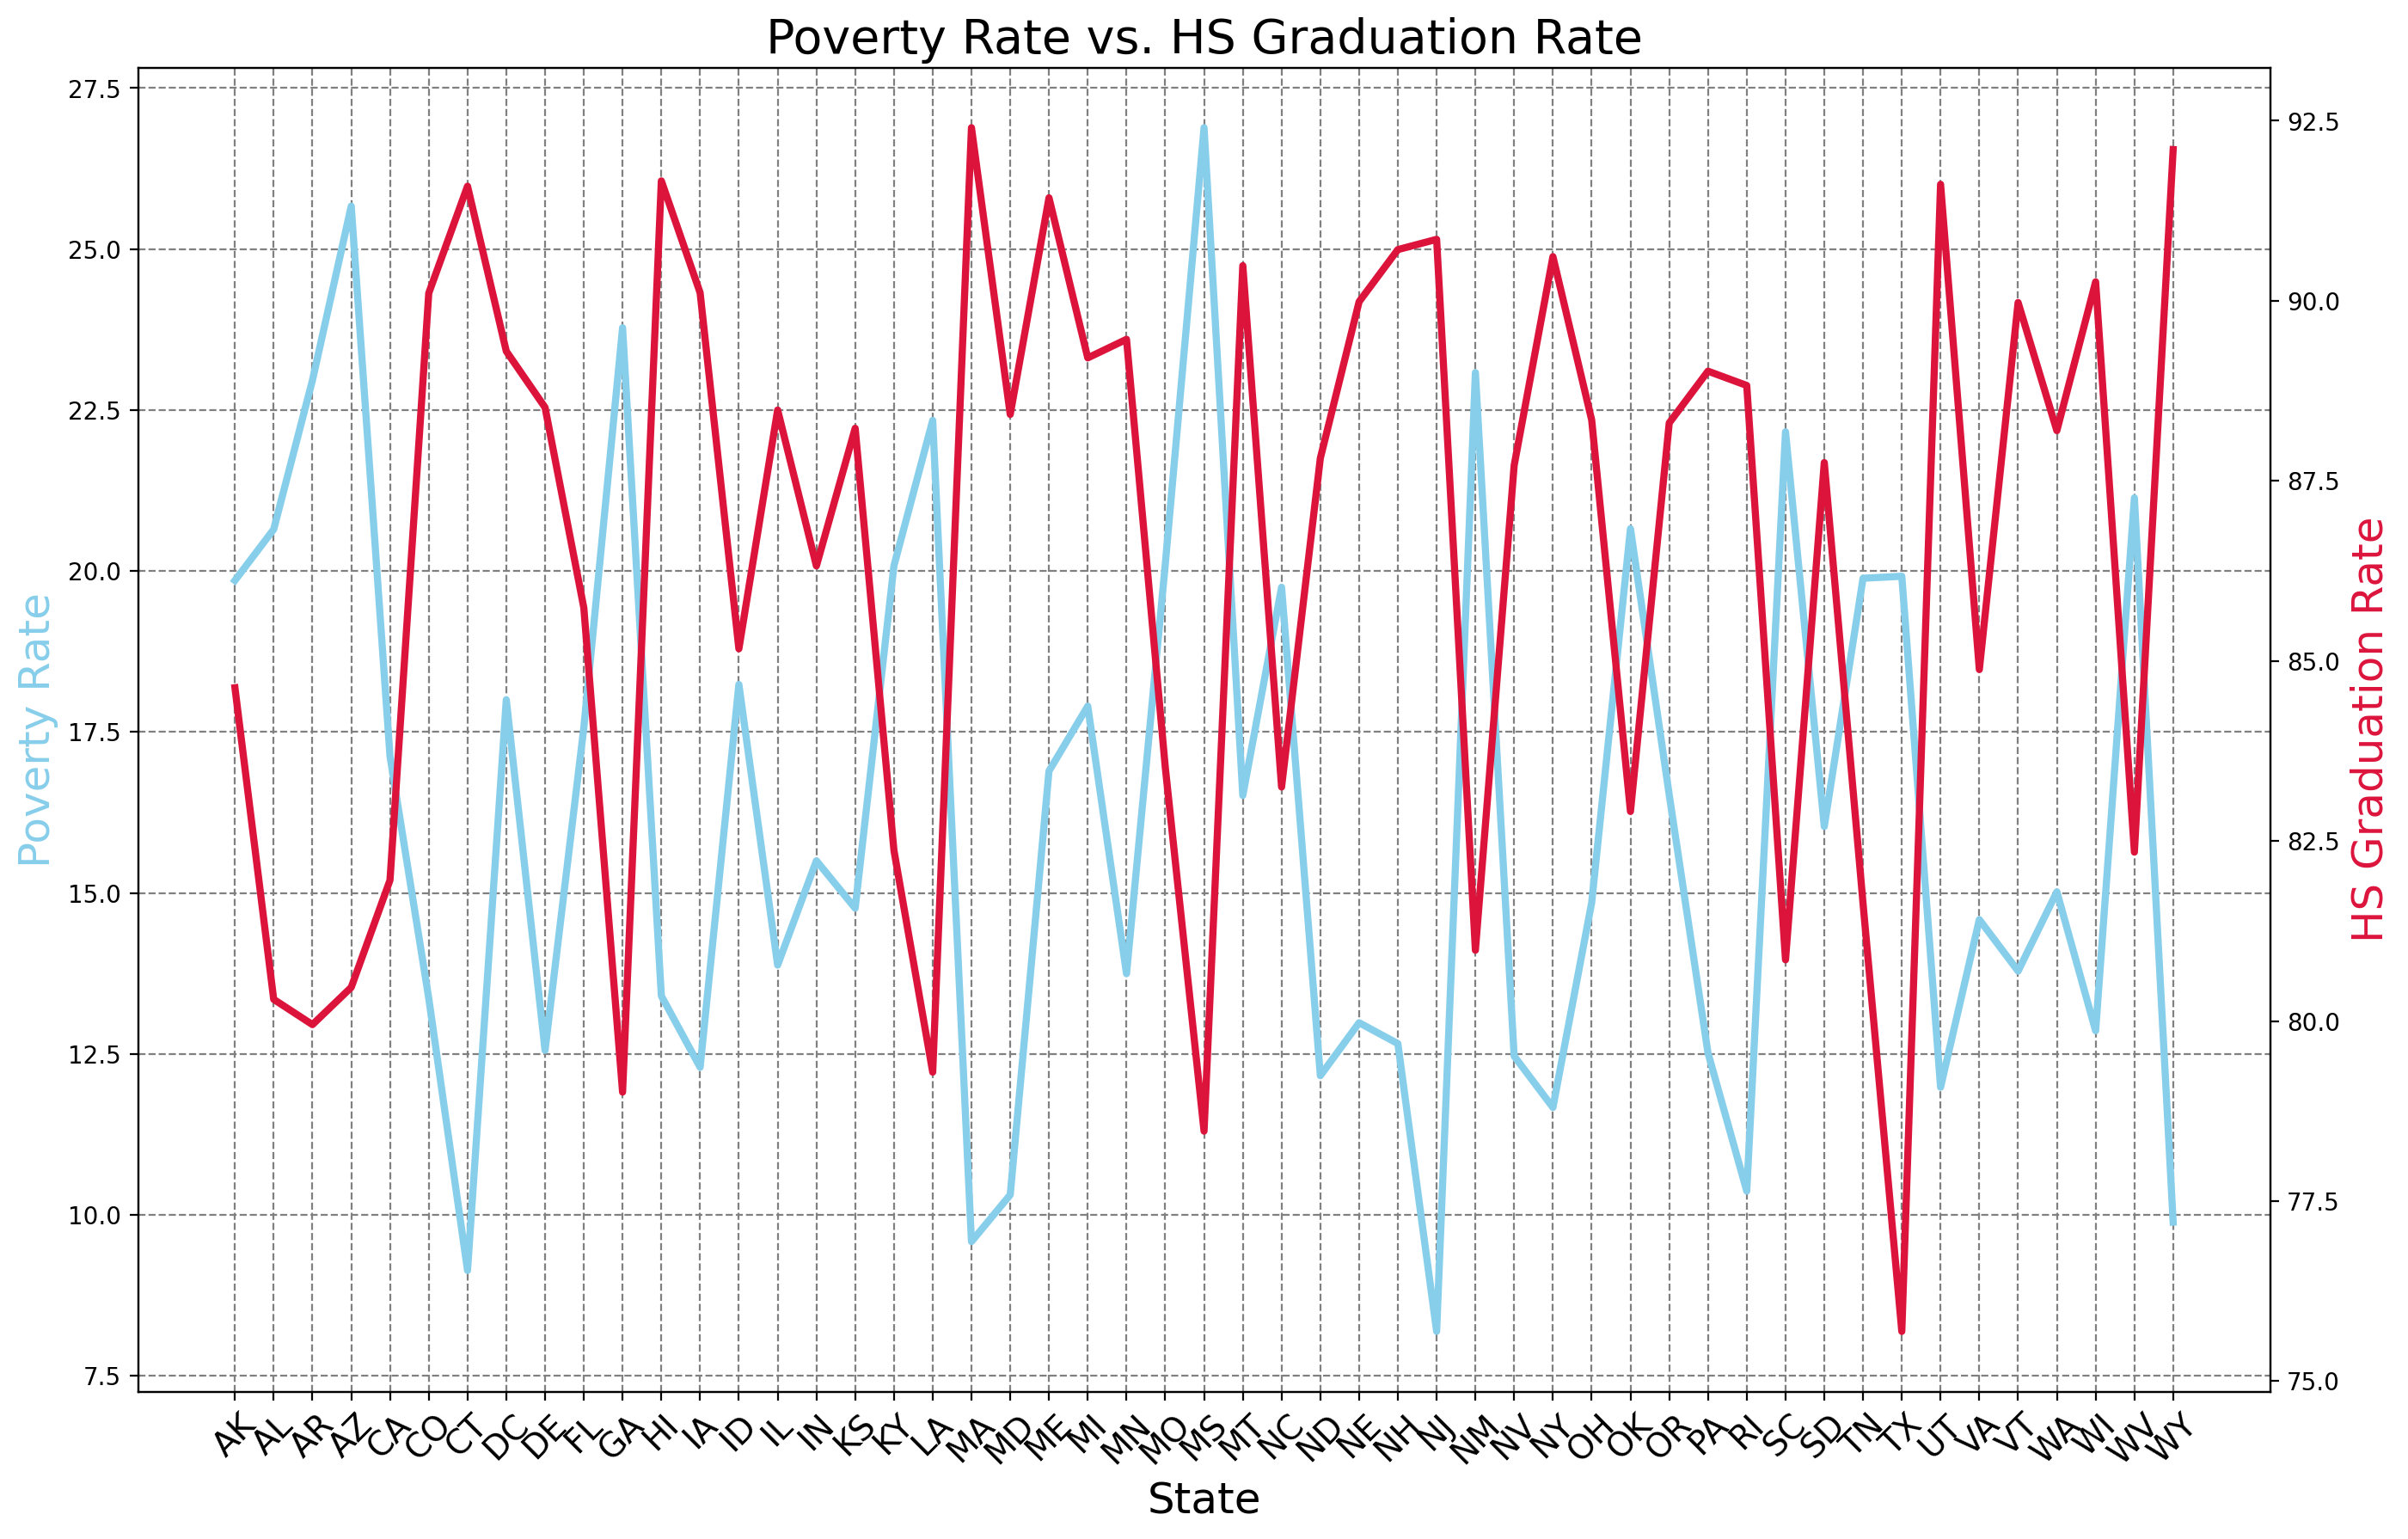

In [57]:
plt.figure(figsize=(16,10), dpi=200)
plt.title("Poverty Rate vs. HS Graduation Rate", fontsize=20)
plt.xticks(fontsize=14, rotation=45)
plt.grid(color="gray", linestyle="dashed")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("State", fontsize=18)
ax1.set_ylabel("Poverty Rate", color="skyblue", fontsize=18)
ax2.set_ylabel("HS Graduation Rate", color="crimson", fontsize=18)
ax1.plot(merged_df.State, merged_df.poverty_rate, color="skyblue", linewidth=3)
ax2.plot(merged_df.State, merged_df.percent_completed_hs, color="crimson", linewidth=3)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

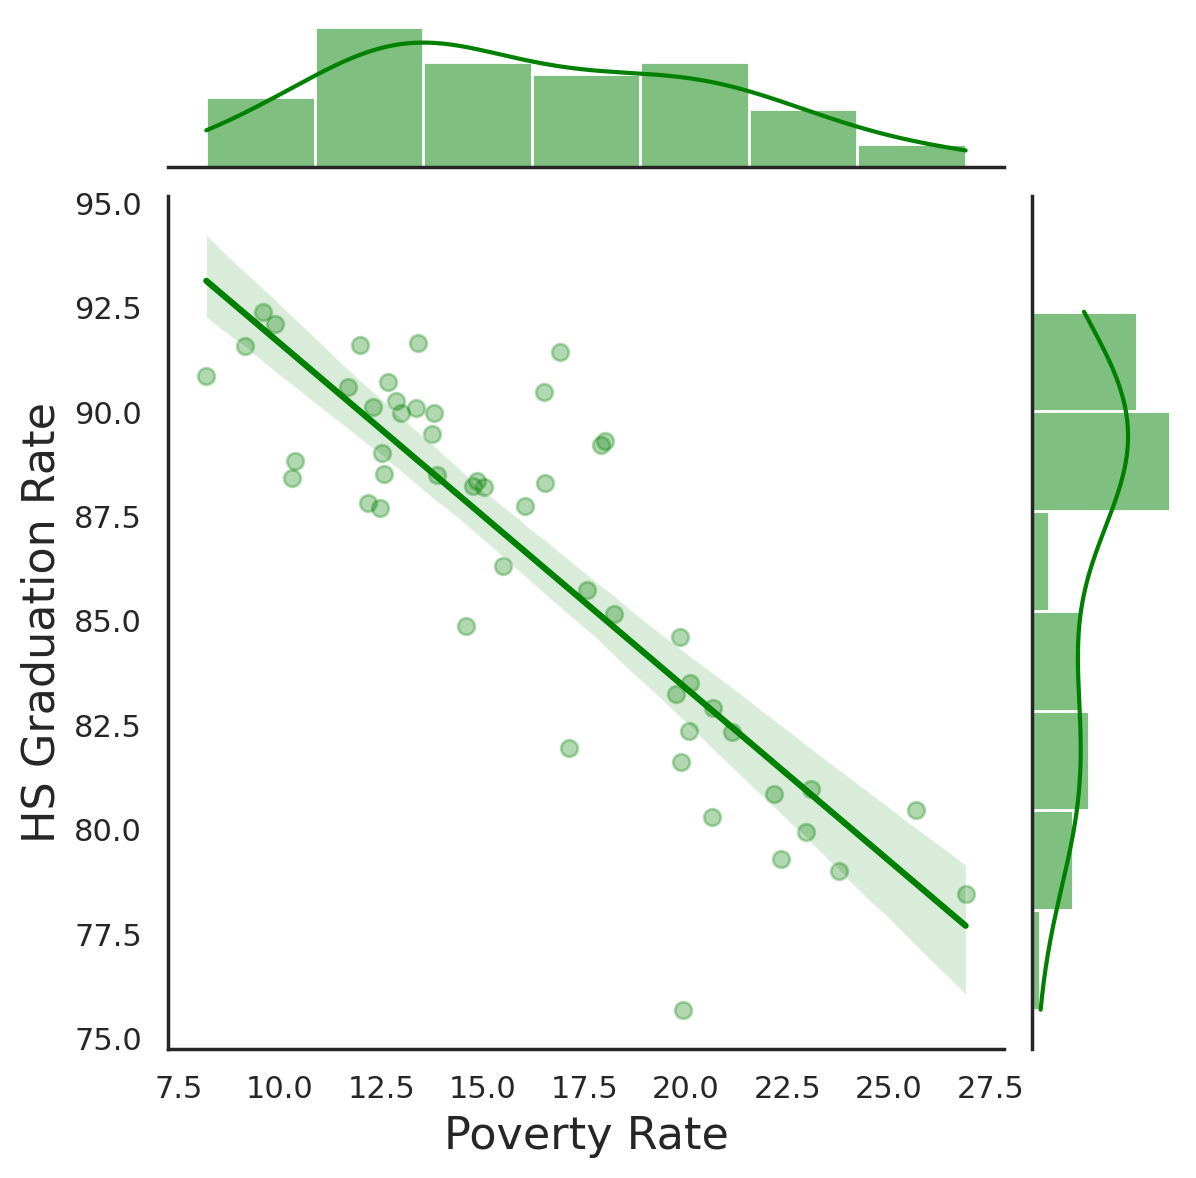

In [60]:
sns.set_theme(style="white", rc={'figure.dpi': 200})
fig = sns.jointplot(data=merged_df,x="poverty_rate", y="percent_completed_hs", color="green", kind="reg", joint_kws={"scatter_kws": {"alpha": 0.3}})
fig.set_axis_labels("Poverty Rate", "HS Graduation Rate", fontsize=16)


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

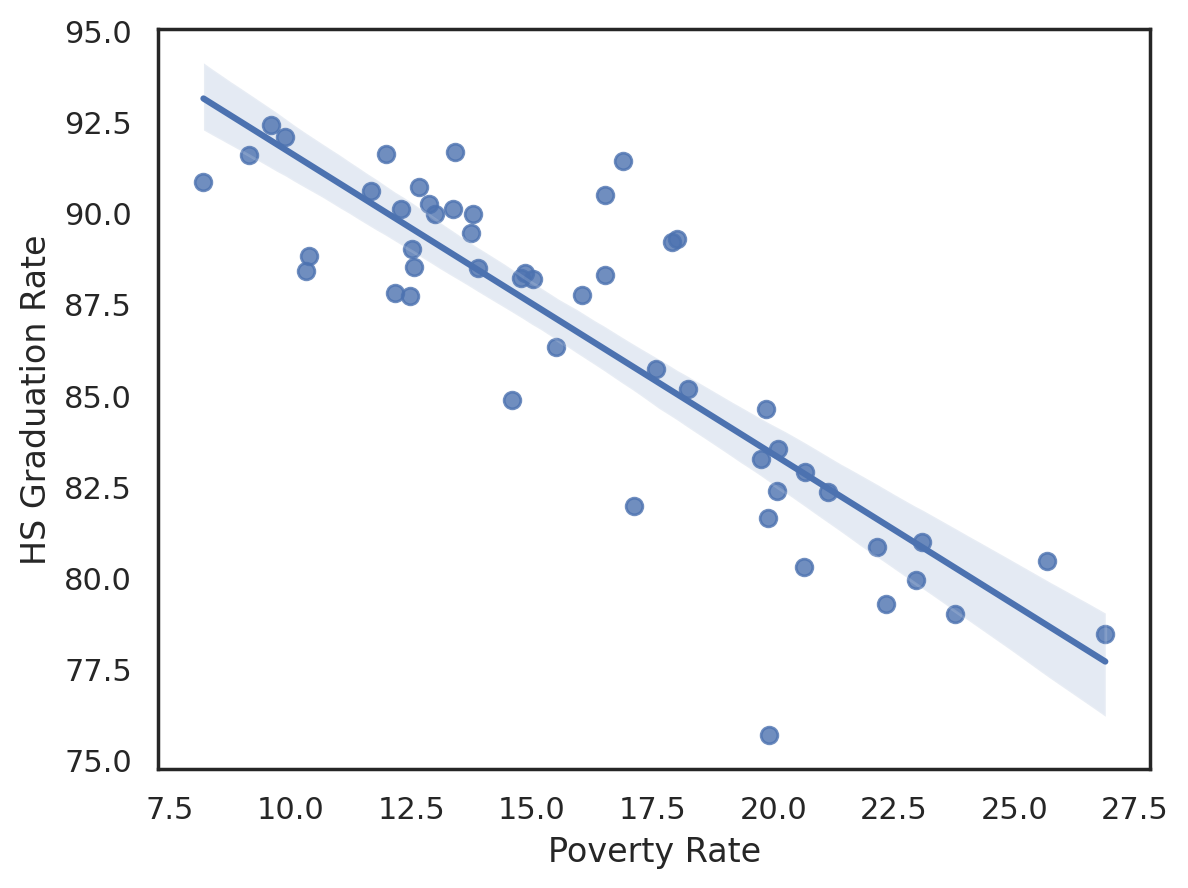

In [65]:
plt.figure(dpi=200)
sns.regplot(merged_df, x="poverty_rate", y="percent_completed_hs")
plt.xlabel("Poverty Rate")
plt.ylabel("HS Graduation Rate")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [66]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [70]:
df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white, errors="coerce")
df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black, errors="coerce")
df_share_race_city.share_native_american = pd.to_numeric(df_share_race_city.share_native_american, errors="coerce")
df_share_race_city.share_asian = pd.to_numeric(df_share_race_city.share_asian, errors="coerce")
df_share_race_city.share_hispanic = pd.to_numeric(df_share_race_city.share_hispanic, errors="coerce")
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [72]:
white = df_share_race_city.groupby("Geographic area").agg({"share_white": pd.Series.mean})
black = df_share_race_city.groupby("Geographic area").agg({"share_black": pd.Series.mean})
native_american = df_share_race_city.groupby("Geographic area").agg({"share_native_american": pd.Series.mean})
asian = df_share_race_city.groupby("Geographic area").agg({"share_asian": pd.Series.mean})
hispanic = df_share_race_city.groupby("Geographic area").agg({"share_hispanic": pd.Series.mean})

In [74]:
from functools import reduce

In [78]:
data_frames = [white, black, native_american, asian, hispanic]
df_merged = reduce(lambda left, right: pd.merge(left, right, on=["Geographic area"], how="outer"), data_frames)
df_merged = df_merged.reset_index()
df_merged.head()

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65


In [84]:
plt.figure(figsize=(16,8), dpi=200)
fig = px.bar(df_merged, x="Geographic area", y=["share_white", "share_hispanic", "share_black", "share_asian", "share_native_american"],
             hover_name = "Geographic area", title="Racial Makeup of US States")
labels={"share_white": "White", "share_hispanic": "Hispanic",  "share_black": "Black", "share_asian": "Asian",  "share_native_american": "Native American"}
fig.for_each_trace(lambda t: t.update(name = labels[t.name],
                                      legendgroup = labels[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, labels[t.name])
                                     )
                  )
fig.update_layout(xaxis_title="State", yaxis_title="Racial Makeup")
fig.show()

<Figure size 3200x1600 with 0 Axes>

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [89]:
deaths_race = df_fatalities.race.value_counts()
deaths_race

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [91]:
fig = px.pie(deaths_race, values=deaths_race.values, names=deaths_race.index, title="Fatalities by Race", hole=.5)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [92]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [93]:
deaths_sex = df_fatalities.gender.value_counts()
deaths_sex

M    2428
F     107
Name: gender, dtype: int64

In [96]:
fig = px.bar(deaths_sex, x=deaths_sex.index, y=deaths_sex.values)
fig.update_layout(xaxis_title="Sex", yaxis_title="Fatalities")
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [117]:
gender_manner = df_fatalities.groupby(["gender", "manner_of_death"]).agg({"name": pd.Series.count}).reset_index()
gender_manner

,gender,manner_of_death,name
0,F,shot,102
1,F,shot and Tasered,5
2,M,shot,2261
3,M,shot and Tasered,167


In [119]:
fig = px.box(gender_manner, x="gender", y="name", color="manner_of_death",
             labels={
                "name": "Fatalities",
                "gender": "Sex"
             })
fig.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [131]:
armed = df_fatalities.groupby("armed", as_index=False).agg({"name": pd.Series.count})
armed.sort_values("name", ascending=False)

,armed,name
25,gun,1398
32,knife,373
67,vehicle,177
64,unarmed,171
65,undetermined,117
...,...,...
7,bayonet,1
29,hand torch,1
37,metal hand tool,1
35,machete and gun,1


In [130]:
171/2526*100

6.7695961995249405

In [133]:
fig = px.bar(armed, x="armed", y="name", labels={
    "armed": "Armed?",
    "name": "Fatalities"
})
fig.update_layout(xaxis={"categoryorder": "total descending"})
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [136]:
under_25 = df_fatalities[df_fatalities.age <= 25]

In [138]:
553/2535*100

21.814595660749507

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [139]:
fig = px.histogram(df_fatalities, x="age")
fig.show()

<ipython-input-140-5fc4eaf698b0>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='age', ylabel='Density'>

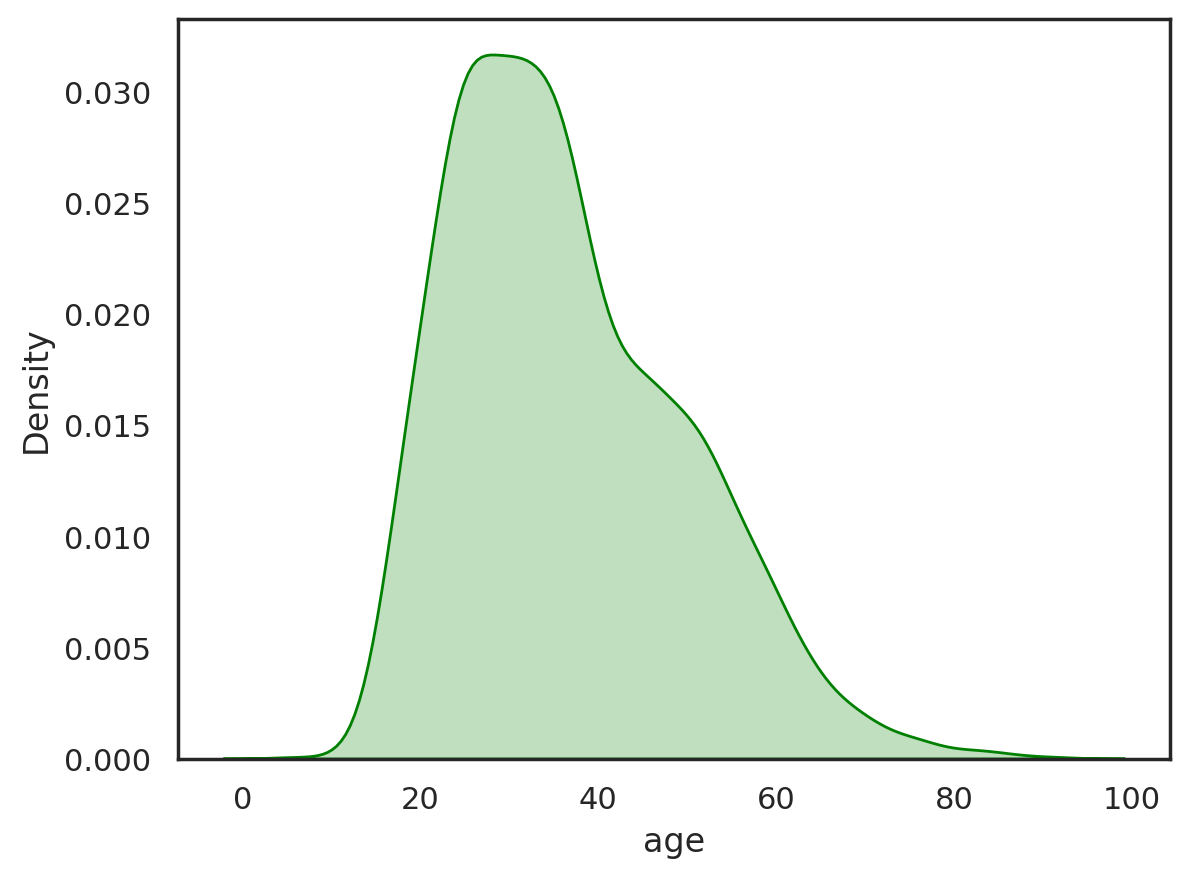

In [140]:
sns.kdeplot(df_fatalities.age, shade=True, color="Green")

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [141]:
age_race = df_fatalities.groupby("race", as_index=False).agg({"age": pd.Series.mean})
age_race

,race,age
0,A,36.61
1,B,31.64
2,H,33.00
3,N,30.45
4,O,33.07
5,W,40.05


<ipython-input-142-2db9f145929c>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='age', ylabel='Density'>

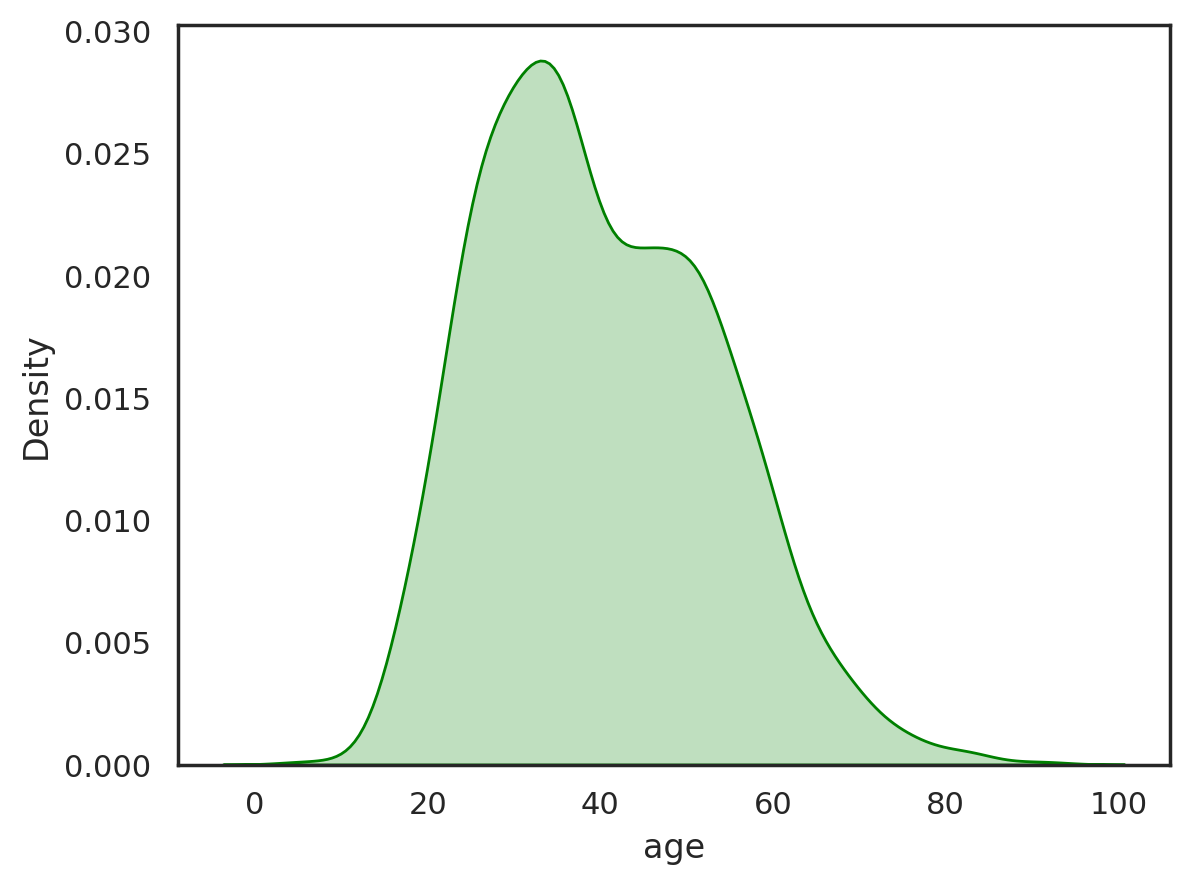

In [142]:
age_white = df_fatalities[df_fatalities.race == "W"]
sns.kdeplot(age_white.age, shade=True, color="Green")

<ipython-input-143-93997f0afc74>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='age', ylabel='Density'>

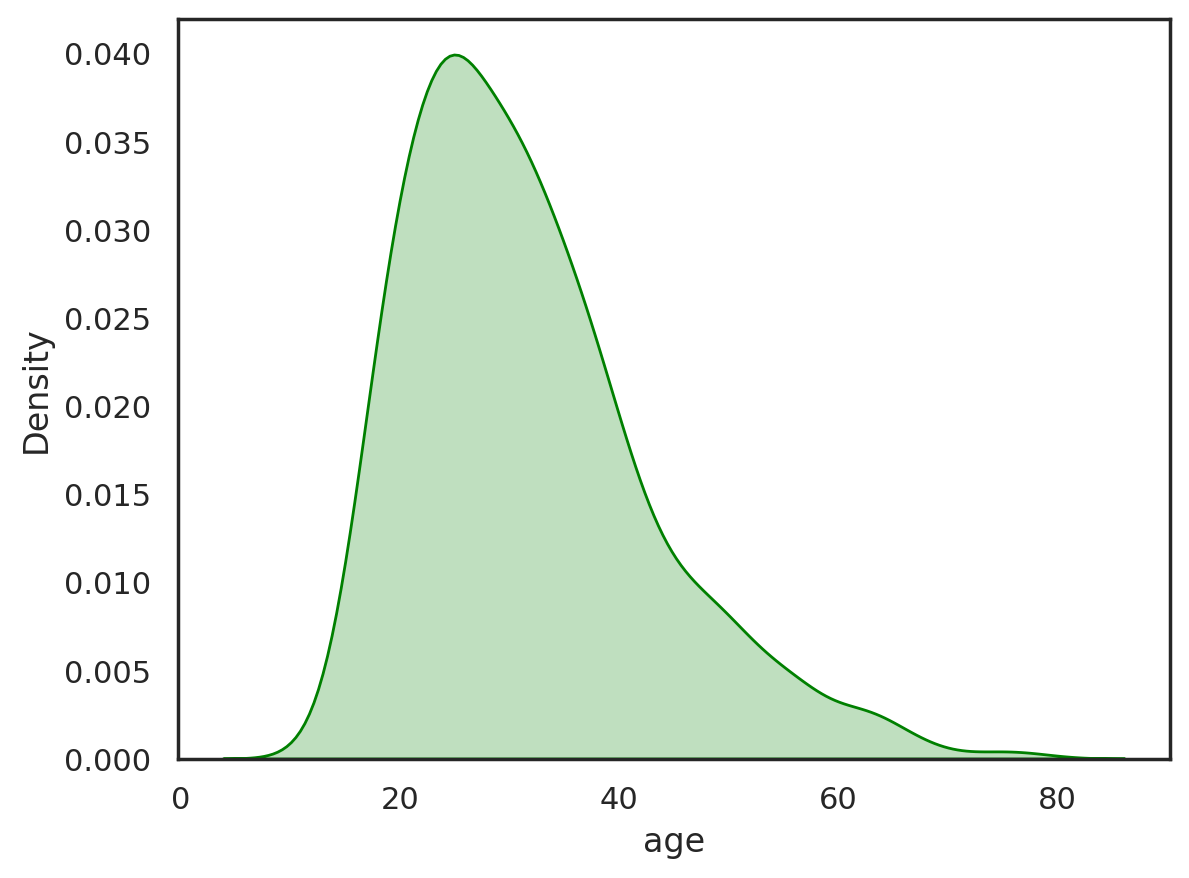

In [143]:
age_black = df_fatalities[df_fatalities.race == "B"]
sns.kdeplot(age_black.age, shade=True, color="Green")

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [149]:
race_chart = df_fatalities.race.value_counts()
race_chart

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [150]:
mental = df_fatalities.signs_of_mental_illness.value_counts()
mental

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [151]:
633/2535*100

24.970414201183434

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [144]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [148]:
city_deaths = df_fatalities.groupby("city").agg({"name": pd.Series.count})
top10_cities = city_deaths.sort_values("name", ascending=False)[:10]
top10_cities

,name
city,
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
San Antonio,20
Columbus,19
Miami,18
Austin,18


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [154]:
cities_race = df_fatalities.groupby(["city", "race"], as_index=False).agg({"name": pd.Series.count})
cities_race
cities_race = cities_race.query("city in @top10_cities.index")
cities_race

,city,race,name
73,Austin,B,3
74,Austin,H,2
75,Austin,W,13
263,Chicago,B,21
264,Chicago,H,1
265,Chicago,W,2
319,Columbus,B,11
320,Columbus,O,1
321,Columbus,W,6
644,Houston,A,1


In [156]:
fig = px.bar(cities_race, x="city", y="name", color="race",
             labels={
                "city": "City",
                "name": "Fatalities",
                "race": "Race"
             })
fig.update_layout(xaxis={"categoryorder": "total descending"})

fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [157]:
state_fatalities = df_fatalities.groupby("state", as_index=False).agg({"name": pd.Series.count})
state_fatalities

,state,name
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424
5,CO,74
6,CT,9
7,DC,11
8,DE,8
9,FL,154


In [160]:
fig = px.choropleth(state_fatalities, locations="state", color="name", locationmode="USA-states", scope="usa",
                    labels={"name": "Fatalities"})
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [163]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2526 non-null   object        
 5   age                      2458 non-null   float64       
 6   gender                   2535 non-null   object        
 7   race                     2340 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2470 non-

In [182]:
deaths_time = df_fatalities.groupby(pd.Grouper(key="date", axis=0, freq="M")).count()

In [184]:
plt.figure(dpi=200)
fig = px.line(deaths_time, x=deaths_time.index, y="name",
              labels={
                  "name": "Fatalities",
                  "date": "Date"
              })
fig.show()

<Figure size 1280x960 with 0 Axes>